<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이상탐지


In [2]:
import tensorflow as tf
(X_train,_),(X_test,_) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

## 이미지에 임의로 노이즈 추가

In [6]:
X_train_noisy = X_train+0.2*tf.random.normal(shape=X_train.shape)
X_test_noisy = X_test+0.2*tf.random.normal(shape=X_test.shape)

- 0과 1사이로 잘라내기

In [12]:
X_train_noisy = tf.clip_by_value(X_train_noisy, clip_value_min=0, clip_value_max=1.0)
X_test_noisy = tf.clip_by_value(X_test_noisy, clip_value_min=0, clip_value_max=1.0)

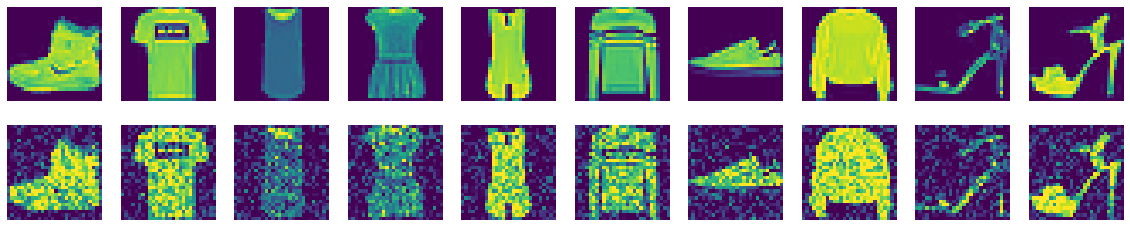

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2,10,(i+1))
  plt.imshow(X_test[i].reshape(28,28))
  plt.axis('off')

  plt.subplot(2,10,(i+1+10))
  plt.imshow(X_test_noisy[i].numpy().reshape(28,28))
  plt.axis('off')

In [15]:
encoder_input = tf.keras.layers.Input(shape=(28,28,1))
x= tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='elu', padding='same', strides=2)(encoder_input)
encoder_output = tf.keras.layers.Conv2D(8,(3,3), activation='elu', padding='same', strides= 2)(x)
encoder = tf.keras.models.Model(encoder_input, encoder_output)
encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
decoder_input = tf.keras.layers.Input(shape=(7,7,8))
x= tf.keras.layers.Conv2DTranspose(filters=32, kernel_size =(3,3), activation='elu', padding="same", strides=2)(decoder_input)
x = tf.keras.layers.Conv2DTranspose(16, (3,3), activation="elu", padding="same", strides=2)(x)
decoder_output = tf.keras.layers.Conv2D(1,(3,3),activation='sigmoid', padding = 'same')(x)

In [17]:
decoder = tf.keras.models.Model(decoder_input, decoder_output)
decoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 7, 8)]         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        2336      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [18]:
#encoder+decoder = autoencoder
encoder_in = tf.keras.layers.Input(shape=(28,28,1))
encoder_out = encoder(encoder_in)
decoder_out = decoder(encoder_out)

In [20]:
auto_encoder = tf.keras.Model(encoder_in, decoder_out)
auto_encoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
functional_1 (Functional)    (None, 7, 7, 8)           1320      
_________________________________________________________________
functional_3 (Functional)    (None, 28, 28, 1)         7105      
Total params: 8,425
Trainable params: 8,425
Non-trainable params: 0
_________________________________________________________________


In [21]:
auto_encoder.compile(optimizer ='adam',loss='mse')
auto_encoder.fit(X_train_noisy, X_train, epochs=10, validation_data=(X_test_noisy, X_test))

Epoch 1/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0135 - val_loss: 0.0081
Epoch 2/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 4/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 5/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 7/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 8/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 9/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 10/10
1875/1875 [==============================] 

In [22]:
auto_encoder.predict(X_test)

array([[[[1.63680315e-03],
         [9.39630700e-05],
         [1.27285719e-04],
         ...,
         [4.30891487e-05],
         [1.22052210e-04],
         [4.83304262e-04]],

        [[2.14755535e-04],
         [1.19330607e-05],
         [1.05775716e-05],
         ...,
         [1.28284228e-05],
         [1.60198761e-05],
         [1.30057335e-04]],

        [[9.60630859e-05],
         [3.14824047e-06],
         [6.70930058e-06],
         ...,
         [2.75304228e-06],
         [3.44100113e-06],
         [6.96472562e-05]],

        ...,

        [[1.98572874e-04],
         [1.65130732e-05],
         [7.33456400e-05],
         ...,
         [2.96533108e-04],
         [1.47908926e-04],
         [3.71992588e-04]],

        [[5.93647710e-05],
         [3.87778664e-06],
         [2.27826495e-05],
         ...,
         [2.72015513e-05],
         [3.89986999e-05],
         [2.37971544e-04]],

        [[1.38086081e-03],
         [2.01195478e-04],
         [2.53289938e-04],
         ...,
 

In [23]:
encoded_imgs = encoder(X_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

In [24]:
plt.imshow(encoded_imgs[])

SyntaxError: ignored

In [ ]:
plt.figure(figsize=(20,6))
for i in range(10):
  plt.subplot(3,10,(i+1))
  plt.imshow(X_test[i].reshape(28,28))
  plt.title('original')
  plt.axis('off')

  plt.subplot(3,10,(i+1+10))
  plt.imshow(X_test[i].numpy().reshape(28,28))
  plt.title('noisy')
  plt.axis('off')

  plt.subplot(3,10,(i+1+20))
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.title('predict')
  plt.axis('off')